In [45]:
import nltk
%matplotlib inline

In [46]:
import urllib.request
import bs4
from bs4 import BeautifulSoup

In [47]:
urlLists = ['https://jobs.atos.net/search/?q=&locationsearch=&optionsFacetsDD_country=&optionsFacetsDD_city=&optionsFacetsDD_customfield2=&optionsFacetsDD_customfield3=&optionsFacetsDD_department=',
              'https://www.capgemini.com/careers/job-search/?show_posts=100',
            'https://www.cgi.fr/fr-fr/careers-search'
              ]
text=""


In [48]:
import requests
i=1;
for url in urlLists:
    page = requests.get(url)

    # Create a BeautifulSoup object
    soup = BeautifulSoup(page.text, 'html.parser')
    if "atos" in url:
        print("atos")
        rs = rs+  soup.find_all(class_='jobTitle-link')
        print(i)
    if "cgi" in url :
        print("cgi")
        rs = rs+ soup.find_all(class_='desktop-show-only')
        
    
    i=i+1
    #desktop-show-only
    

atos
1
cgi


In [49]:
print(rs)

[<a class="jobTitle-link" href="/job/M%C3%BCnchen-Senior-Consultant-f%C3%BCr-O365-und-SharePoint-%28mwd%29-Baye/516953101/">Senior Consultant für O365 und SharePoint (m/w/d)</a>, <a class="jobTitle-link" href="/job/M%C3%BCnchen-Senior-Consultant-f%C3%BCr-O365-und-SharePoint-%28mwd%29-Baye/516953101/">Senior Consultant für O365 und SharePoint (m/w/d)</a>, <a class="jobTitle-link" href="/job/Krakow-Technology-Strategy-&amp;-Innovation-Business-Consultant-Krak/535973201/">Technology Strategy &amp; Innovation Business Consultant</a>, <a class="jobTitle-link" href="/job/Krakow-Technology-Strategy-&amp;-Innovation-Business-Consultant-Krak/535973201/">Technology Strategy &amp; Innovation Business Consultant</a>, <a class="jobTitle-link" href="/job/Seclin-59-Citoyen-2_0-%28FH%29-en-Stage-Nord/557225001/">Citoyen 2.0 (F/H) en Stage</a>, <a class="jobTitle-link" href="/job/Seclin-59-Citoyen-2_0-%28FH%29-en-Stage-Nord/557225001/">Citoyen 2.0 (F/H) en Stage</a>, <a class="jobTitle-link" href="/job

In [77]:
jobs=''
for title in rs:
    job = title.text
    job=job.replace("(m/w/d)",'').replace("(H/F)",'').replace("(F/H)",'').replace("(m/f/d)",'').replace("(H/F)",'')
    jobs = jobs + job

In [78]:
print (jobs)

Senior Consultant für O365 und SharePoint Senior Consultant für O365 und SharePoint Technology Strategy & Innovation Business ConsultantTechnology Strategy & Innovation Business ConsultantCitoyen 2.0  en StageCitoyen 2.0  en StageDéveloppement d'un SI de gestion de surveillance électronique  en StageDéveloppement d'un SI de gestion de surveillance électronique  en StageDéveloppement d'un SI de gestion de surveillance électronique  en StageDéveloppement d'un SI de gestion de surveillance électronique  en StageBig Data Architect/DeveloperBig Data Architect/DeveloperCustomer Engagement EngineerCustomer Engagement EngineerAdapter les concepts de Blockchain à des enjeux métier innovants  en StageAdapter les concepts de Blockchain à des enjeux métier innovants  en StageAchat junior  en StageAchat junior  en StageAdapter les concepts de Blockchain à des enjeux métier innovants  en StageAdapter les concepts de Blockchain à des enjeux métier innovants  en StageProject Manager  - Referenz: 14176

In [79]:
from string import punctuation

# remove numbers
jobs = ''.join(c for c in jobs if not c.isdigit())

# remove punctuation and make lower case
jobs = ''.join(c for c in jobs if c not in punctuation).lower()

#remove short strings
#jobs = ''.join(c for c in jobs if len(c)>=4)
#result = jobs.compile(r'\W*\b\w{1,3}\b')

#print(typeOf(jobs))

In [81]:
print(jobs)

senior consultant für o und sharepoint senior consultant für o und sharepoint technology strategy  innovation business consultanttechnology strategy  innovation business consultantcitoyen   en stagecitoyen   en stagedéveloppement dun si de gestion de surveillance électronique  en stagedéveloppement dun si de gestion de surveillance électronique  en stagedéveloppement dun si de gestion de surveillance électronique  en stagedéveloppement dun si de gestion de surveillance électronique  en stagebig data architectdeveloperbig data architectdevelopercustomer engagement engineercustomer engagement engineeradapter les concepts de blockchain à des enjeux métier innovants  en stageadapter les concepts de blockchain à des enjeux métier innovants  en stageachat junior  en stageachat junior  en stageadapter les concepts de blockchain à des enjeux métier innovants  en stageadapter les concepts de blockchain à des enjeux métier innovants  en stageproject manager   referenz project manager   referenz 

In [82]:
tokens = [t for t in jobs.split()] 
print(tokens)

['senior', 'consultant', 'für', 'o', 'und', 'sharepoint', 'senior', 'consultant', 'für', 'o', 'und', 'sharepoint', 'technology', 'strategy', 'innovation', 'business', 'consultanttechnology', 'strategy', 'innovation', 'business', 'consultantcitoyen', 'en', 'stagecitoyen', 'en', 'stagedéveloppement', 'dun', 'si', 'de', 'gestion', 'de', 'surveillance', 'électronique', 'en', 'stagedéveloppement', 'dun', 'si', 'de', 'gestion', 'de', 'surveillance', 'électronique', 'en', 'stagedéveloppement', 'dun', 'si', 'de', 'gestion', 'de', 'surveillance', 'électronique', 'en', 'stagedéveloppement', 'dun', 'si', 'de', 'gestion', 'de', 'surveillance', 'électronique', 'en', 'stagebig', 'data', 'architectdeveloperbig', 'data', 'architectdevelopercustomer', 'engagement', 'engineercustomer', 'engagement', 'engineeradapter', 'les', 'concepts', 'de', 'blockchain', 'à', 'des', 'enjeux', 'métier', 'innovants', 'en', 'stageadapter', 'les', 'concepts', 'de', 'blockchain', 'à', 'des', 'enjeux', 'métier', 'innovants'

In [89]:
from nltk.corpus import stopwords  
sr= stopwords.words('french')
sr=sr+stopwords.words('english')
#print(sr)
clean_tokens = tokens[:]
for token in tokens:
    if token in sr:
        clean_tokens.remove(token) 
        freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items():
    print(str(key) + ':' + str(val))

senior:24
consultant:20
für:12
und:12
sharepoint:12
technology:7
strategy:6
innovation:6
business:25
consultanttechnology:3
consultantcitoyen:3
stagecitoyen:18
stagedéveloppement:12
dun:18
si:12
gestion:12
surveillance:12
électronique:24
stagebig:3
data:6
architectdeveloperbig:3
architectdevelopercustomer:3
engagement:8
engineercustomer:3
engineeradapter:3
concepts:12
blockchain:12
enjeux:12
métier:12
innovants:12
stageadapter:9
stageachat:18
junior:20
stageproject:3
manager:56
referenz:24
project:8
gdc:3
bds:6
associate:6
soc:6
cyber:9
securitygdc:3
securitykey:3
account:15
managerkey:3
managercitoyen:3
stageconteneur:6
docker:6
stagechargée:12
développement:36
rh:12
stagesystem:3
controllersystem:3
controllerinternal:3
auditorinternal:3
auditorproject:3
team:11
customer:6
contact:6
center:12
solution:9
integration:6
designer:6
apisolution:3
apioperations:3
applications:8
operations:15
leaderteam:6
leaderaccount:3
security:40
architectcyber:3
architectsr:6
architectcloud:3
architect:1

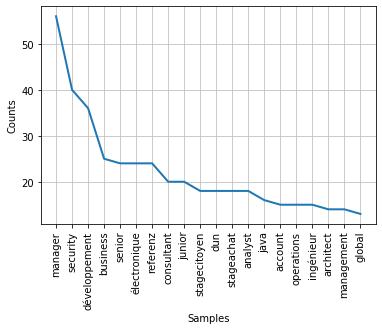

In [90]:
freq.plot(20, cumulative=False)